In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, join
import Euclid

%erun Phosphoros

from PhzCLI.PlotSpecZComparison import compute_stats, displayHistogram

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

In [2]:
truth = Table.read('/home/aalvarez/Work/Data/PV/Prod/lsst/75769/TU_GAL_75769.fits')

In [3]:
orig = Table.read('/home/aalvarez/Work/Data/PV/Prod/lsst/75769/NnpzLsst/output_file.fits', hdu=1)
len(orig)

2117

In [4]:
bins = Table.read('/home/aalvarez/Work/Data/PV/Prod/lsst/75769/NnpzLsst/output_file.fits', hdu=2)
bins = bins['BINS_PDF']

In [5]:
smooth = Table.read('/home/aalvarez/Work/Data/PV/Prod/lsst/75769/GaussianAuto.fits', hdu=1)
len(smooth)

2117

In [6]:
cross = join(orig, smooth, 'OBJECT_ID', table_names=['orig', 'smooth'])
cross = join(cross, truth, 'OBJECT_ID')

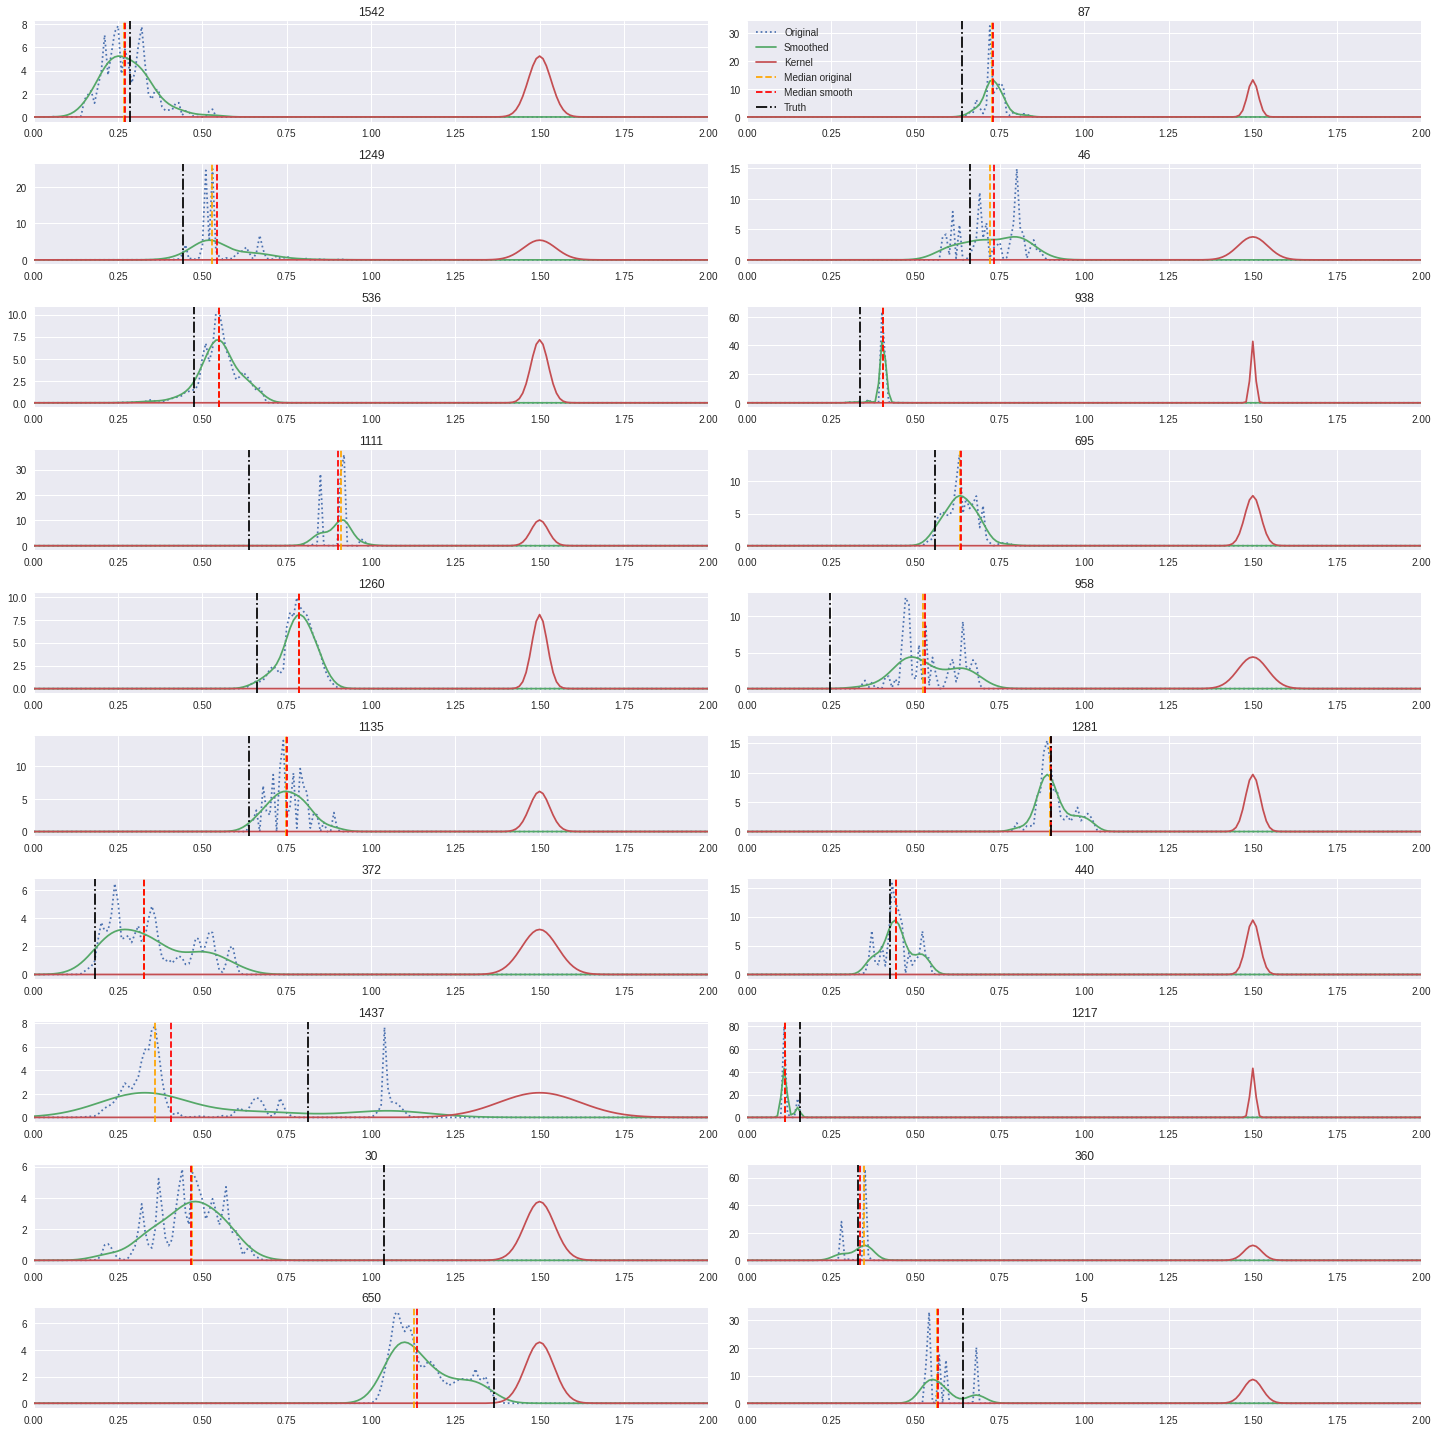

In [14]:
idxs = np.random.randint(len(cross), size=20)

fig, axes = plt.subplots(ncols=2, nrows=10, figsize=(20, 20))
for i, ax in enumerate(axes.ravel()):
    row = cross[idxs[i]]
    kernel =  row['REDSHIFT_PDF_KERNEL'][150:450]
    kernel /= kernel.max()
    kernel *= row['REDSHIFT_PDF_smooth'].max()
    ax.plot(bins, row['REDSHIFT_PDF_orig'], linestyle=':', label='Original')
    ax.plot(bins, row['REDSHIFT_PDF_smooth'], label='Smoothed')
    ax.plot(bins[:300], kernel, label='Kernel')
    ax.set_title(idxs[i])
    ax.axvline(row['REDSHIFT_MEDIAN_orig'], linestyle='--', color='orange', label='Median original')
    ax.axvline(row['REDSHIFT_MEDIAN_smooth'], linestyle='--', color='red', label='Median smooth')
    ax.axvline(row['Z_OBS'], linestyle='-.', color='black', label='Truth')
    ax.set_xlim(0, 2.)
    
axes[0, 1].legend()
plt.tight_layout()
plt.savefig('/home/aalvarez/Downloads/smooth.pdf')
plt.show()

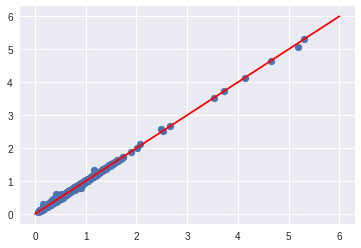

In [8]:
plt.figure()
plt.scatter(cross['REDSHIFT_MEDIAN_orig'], cross['REDSHIFT_MEDIAN_smooth'])
plt.plot([0,6],[0,6], 'red')

In [9]:
def histogram(truth, phz):
    data, mean, median, sigma, mad, nmad, outliersPercent, sigmaNoOutliers, meanNoOutliers = compute_stats(truth, phz)
    displayHistogram(data, mean, median, mad, nmad, sigma, outliersPercent, sigmaNoOutliers, meanNoOutliers)

--> Mean                :  -0.011385011
--> Median              :  -0.004258102
--> Sigma               :  0.18439698
--> Mad                 :  0.038537234
--> NMad                :  0.05713530322909355
--> Outliers            :  12.64367816091954 %
--> Sigma (no outliers) :  0.03510622


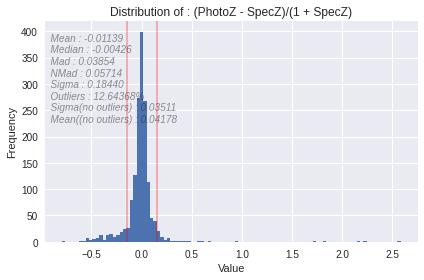

In [10]:
histogram(cross['Z_OBS'], cross['REDSHIFT_MEDIAN_orig'])

--> Mean                :  -0.011136695
--> Median              :  -0.0047143167
--> Sigma               :  0.1836074
--> Mad                 :  0.038527302
--> NMad                :  0.05712057860344648
--> Outliers            :  12.260536398467433 %
--> Sigma (no outliers) :  0.03540666


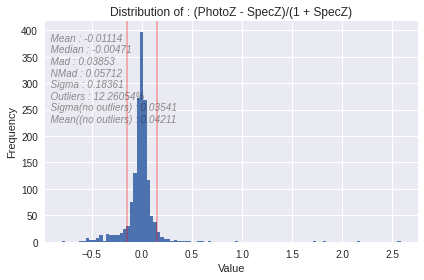

In [11]:
histogram(cross['Z_OBS'], cross['REDSHIFT_MEDIAN_smooth'])

--> Mean                :  -0.01160396
--> Median              :  -0.0044262838
--> Sigma               :  0.18637303
--> Mad                 :  0.040067602
--> NMad                :  0.05940422664955258
--> Outliers            :  13.47381864623244 %
--> Sigma (no outliers) :  0.035946105


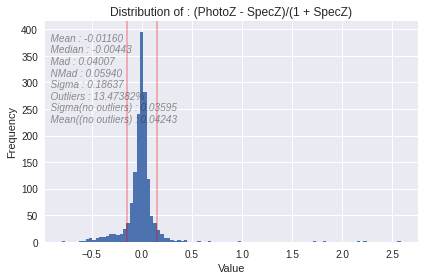

In [12]:
histogram(cross['Z_OBS'], bins[np.argmax(cross['REDSHIFT_PDF_orig'],axis=1)])

--> Mean                :  -0.01190453
--> Median              :  -0.0048646117
--> Sigma               :  0.18598177
--> Mad                 :  0.03922478
--> NMad                :  0.05815466045290232
--> Outliers            :  13.090676883780333 %
--> Sigma (no outliers) :  0.03566885


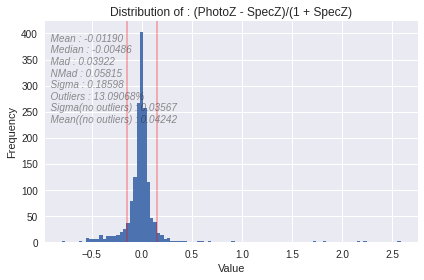

In [13]:
histogram(cross['Z_OBS'], bins[np.argmax(cross['REDSHIFT_PDF_smooth'],axis=1)])